In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline

In [2]:
# Reading the data set and dispalay the first 10 rows
path = "/home/akorir/Documents/Exams/projects/healthcare/HealthInsurance.xlsx"
df = pd.read_excel(path)
df.head(10)

,pid,self-reported health status,age in years,Is there any hindrace to receiving medical attention,gender of the respondent,Do you have health insurance?,Are you married?,Are you self employed?,house hold size,region of residence,respondent's ethnicity,highest level of education
0,PO1,yes,31,no,male,yes,yes,yes,4,south,zulu,bachelor
1,PO2,yes,31,no,female,yes,yes,no,4,south,zulu,high-school
2,PO3,yes,54,no,male,yes,yes,no,5,west,zulu,adult-education
3,PO4,yes,27,no,male,yes,no,no,5,west,zulu,high-school
4,PO5,yes,39,no,male,yes,yes,no,5,west,zulu,none
5,PO6,yes,32,no,female,no,no,no,3,south,ndembele,bachelor
6,PO7,no,56,yes,female,yes,yes,no,2,west,zulu,high-school
7,PO8,yes,60,no,female,yes,yes,no,2,south,zulu,high-school
8,PO9,yes,62,no,male,yes,yes,no,2,south,zulu,high-school
9,PO10,yes,52,no,female,no,yes,no,2,northeast,ndembele,high-school


In [3]:
# Renaming the column headers
df.columns = ["pid","report","age","hindrance","gender","insured","married","employed",
              "household","residence","ethnicity","education"]
df.head(10)

,pid,report,age,hindrance,gender,insured,married,employed,household,residence,ethnicity,education
0,PO1,yes,31,no,male,yes,yes,yes,4,south,zulu,bachelor
1,PO2,yes,31,no,female,yes,yes,no,4,south,zulu,high-school
2,PO3,yes,54,no,male,yes,yes,no,5,west,zulu,adult-education
3,PO4,yes,27,no,male,yes,no,no,5,west,zulu,high-school
4,PO5,yes,39,no,male,yes,yes,no,5,west,zulu,none
5,PO6,yes,32,no,female,no,no,no,3,south,ndembele,bachelor
6,PO7,no,56,yes,female,yes,yes,no,2,west,zulu,high-school
7,PO8,yes,60,no,female,yes,yes,no,2,south,zulu,high-school
8,PO9,yes,62,no,male,yes,yes,no,2,south,zulu,high-school
9,PO10,yes,52,no,female,no,yes,no,2,northeast,ndembele,high-school


In [11]:
# Identify and count the missing values in each column
#"True" represents a missing value, "False" means the value is present in the dataset

missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

pid
False    8802
Name: pid, dtype: int64

report
False    8802
Name: report, dtype: int64

age
False    8802
Name: age, dtype: int64

hindrance
False    8802
Name: hindrance, dtype: int64

gender
False    8802
Name: gender, dtype: int64

insured
False    8802
Name: insured, dtype: int64

married
False    8802
Name: married, dtype: int64

employed
False    8802
Name: employed, dtype: int64

household
False    8802
Name: household, dtype: int64

residence
False    8802
Name: residence, dtype: int64

ethnicity
False    8802
Name: ethnicity, dtype: int64

education
False    8802
Name: education, dtype: int64



In [5]:
df["insured"].value_counts()

yes    7052
no     1750
Name: insured, dtype: int64

In [6]:
df["gender"].value_counts()

male      4633
female    4169
Name: gender, dtype: int64

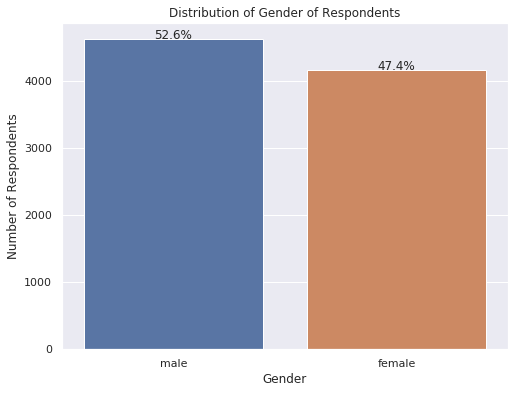

In [12]:
# for gender we use a count plot

plt.figure(figsize = (8,6))
sns.set(style = "darkgrid")
ax = sns.countplot(x = 'gender', data = df)
plt.title('Distribution of Gender of Respondents')
plt.ylabel('Number of Respondents')
plt.xlabel('Gender')

ncount = len(df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            '{:.1f}%'.format(100 * height/ncount), ha = "center")

In [13]:
df.groupby("insured").mean()

,age,household
insured,,
no,35.568571,3.331429
yes,39.772689,3.034458


The average age of respondents having healthcare insurance is higher than that of those who didn’t.
The average household size of respondents having healthcare insurance is lower than those who didn't.

Text(0, 0.5, 'Frequency of Insured')

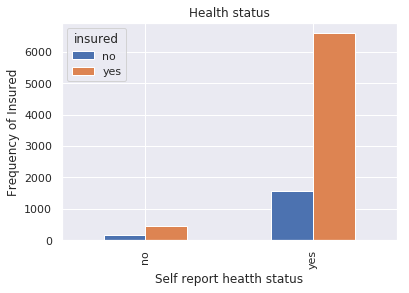

In [15]:
pd.crosstab(df.report, df.insured).plot(kind = 'bar')
plt.title('Health status')
plt.xlabel('Self report heatth status')
plt.ylabel('Frequency of Insured')

The purchase of the healthcare insurance depends a great deal on the health status. 
Thus, the self report health status can be a good predictor of the outcome variable.

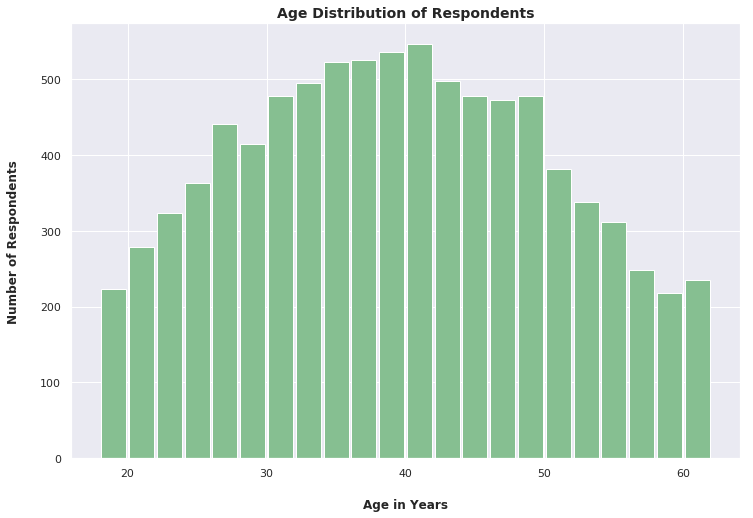

In [16]:
ax = df.hist(column = 'age', bins = 22, grid = True, figsize = (12,8), 
             color = '#86bf91', zorder = 2, rwidth = 0.9)

ax = ax[0]
for x in ax:

    # Switch off ticks
    x.tick_params(axis =" both", which = "both", bottom = "off", top = "off", labelbottom = "on", 
                  left = "off", right = "off", labelleft = "on")

    # Set title
    x.set_title("Age Distribution of Respondents", weight = 'bold', size = 14)

    # Set x-axis label
    x.set_ylabel("Number of Respondents", labelpad = 20, weight = 'bold', size = 12)

    # Set y-axis label
    x.set_xlabel("Age in Years", labelpad = 20, weight = 'bold', size = 12)

Most of the respondents in this dataset are in the age range of 30–50

Text(0, 0.5, 'Frequency')

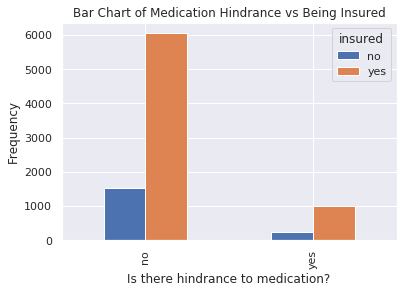

In [21]:
pd.crosstab(df.hindrance, df.insured).plot(kind = 'bar')
plt.title('Bar Chart of Medication Hindrance vs Being Insured')
plt.xlabel('Is there hindrance to medication?')
plt.ylabel('Frequency')

Medical hindrance seems a good predictor of the outcome variable

Text(0, 0.5, 'Frequency')

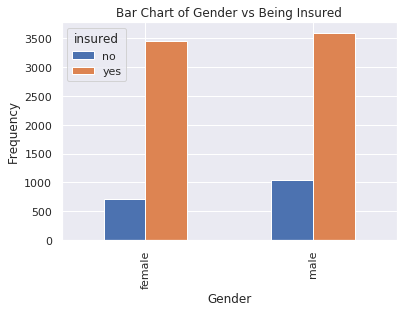

In [23]:
pd.crosstab(df.gender, df.insured).plot(kind = 'bar')
plt.title('Bar Chart of Gender vs Being Insured')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Gender seems a good predictor of the outcome variable

Text(0, 0.5, 'Frequency')

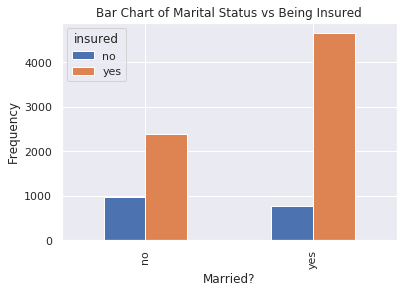

In [25]:
pd.crosstab(df.married, df.insured).plot(kind = 'bar')
plt.title('Bar Chart of Marital Status vs Being Insured')
plt.xlabel('Married?')
plt.ylabel('Frequency')

Marital status seems a good predictor of the outcome variable

Text(0, 0.5, 'Frequency')

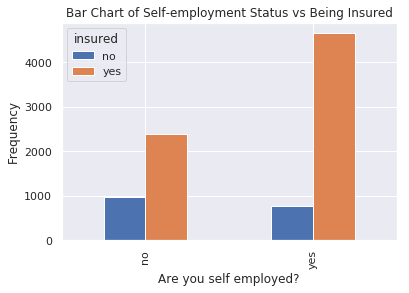

In [26]:
pd.crosstab(df.married, df.insured).plot(kind = 'bar')
plt.title('Bar Chart of Self-employment Status vs Being Insured')
plt.xlabel('Are you self employed?')
plt.ylabel('Frequency')

Self employment status seems a good predictor of the outcome variable

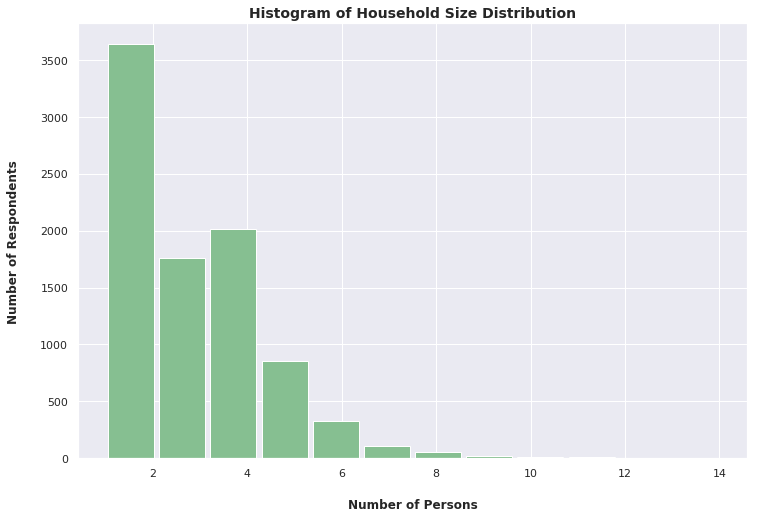

In [34]:
ax = df.hist(column = 'household', bins = 12, grid = True, figsize = (12,8), 
             color = '#86bf91', zorder = 2, rwidth = 0.9)

ax = ax[0]
for x in ax:

    # Switch off ticks
    x.tick_params(axis =" both", which = "both", bottom = "off", top = "off", labelbottom = "on", 
                  left = "off", right = "off", labelleft = "on")

    # Set title
    x.set_title("Histogram of Household Size Distribution", weight = 'bold', size = 14)

    # Set x-axis label
    x.set_ylabel("Number of Respondents", labelpad = 20, weight = 'bold', size = 12)

    # Set y-axis label
    x.set_xlabel("Number of Persons", labelpad = 20, weight = 'bold', size = 12)

Average household size is less than 4 persons

Text(0, 0.5, 'Frequency')

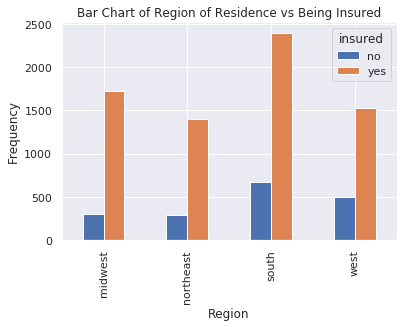

In [36]:
pd.crosstab(df.residence, df.insured).plot(kind = 'bar')
plt.title('Bar Chart of Region of Residence vs Being Insured')
plt.xlabel('Region')
plt.ylabel('Frequency')

Region of residence seems a good predictor of the outcome variable

Text(0, 0.5, 'Frequency')

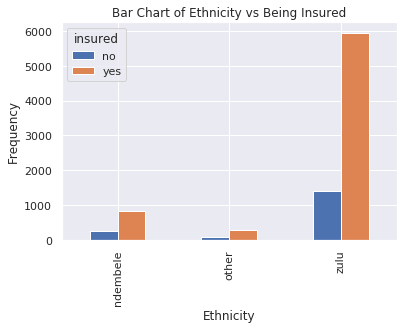

In [37]:
pd.crosstab(df.ethnicity, df.insured).plot(kind = 'bar')
plt.title('Bar Chart of Ethnicity vs Being Insured')
plt.xlabel('Ethnicity')
plt.ylabel('Frequency')

Ethicity seems a good predictor of the outcome variable

Text(0, 0.5, 'Frequency')

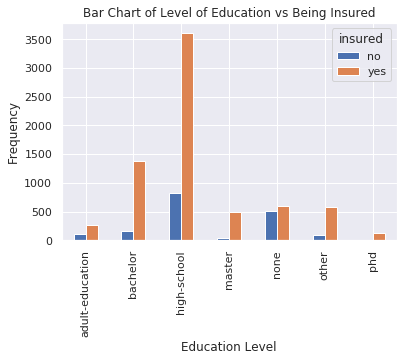

In [38]:
pd.crosstab(df.education, df.insured).plot(kind = 'bar')
plt.title('Bar Chart of Level of Education vs Being Insured')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Level of education seems a good predictor of the outcome variable

In [4]:
# using categorical values

df['insured'] = df['insured'].astype('category').cat.codes
df['report'] = df['report'].astype('category').cat.codes
df['hindrance'] = df['hindrance'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['married'] = df['married'].astype('category').cat.codes
df['employed'] = df['employed'].astype('category').cat.codes
df['residence'] = df['residence'].astype('category').cat.codes
df['ethnicity'] = df['ethnicity'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes

In [5]:
df.head(10)

,pid,report,age,hindrance,gender,insured,married,employed,household,residence,ethnicity,education
0,PO1,1,31,0,1,1,1,1,4,2,2,1
1,PO2,1,31,0,0,1,1,0,4,2,2,2
2,PO3,1,54,0,1,1,1,0,5,3,2,0
3,PO4,1,27,0,1,1,0,0,5,3,2,2
4,PO5,1,39,0,1,1,1,0,5,3,2,4
5,PO6,1,32,0,0,0,0,0,3,2,0,1
6,PO7,0,56,1,0,1,1,0,2,3,2,2
7,PO8,1,60,0,0,1,1,0,2,2,2,2
8,PO9,1,62,0,1,1,1,0,2,2,2,2
9,PO10,1,52,0,0,0,1,0,2,1,0,2


In [6]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [7]:
#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
testColumns = ['report', 'age', 'hindrance', 'gender', 'married', 'employed', 'household', 
                  'residence', 'ethnicity', 'education']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="insured" )  

report is IMPORTANT for Prediction
age is IMPORTANT for Prediction
hindrance is NOT an important predictor. (Discard hindrance from model)
gender is IMPORTANT for Prediction
married is IMPORTANT for Prediction
employed is IMPORTANT for Prediction
household is IMPORTANT for Prediction
residence is IMPORTANT for Prediction
ethnicity is IMPORTANT for Prediction
education is IMPORTANT for Prediction


In [25]:
# Defining X
X = np.asarray(df[['report', 'age', 'gender', 'married', 'employed', 'household', 
                  'residence', 'education']])
X[0:3]


array([[ 1, 31,  1,  1,  1,  4,  2,  1],
       [ 1, 31,  0,  1,  0,  4,  2,  2],
       [ 1, 54,  1,  1,  0,  5,  3,  0]])

In [26]:
# Defining y
y = np.asarray(df['insured'])
y [0:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int8)

In [27]:
# normalize the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.27741796, -0.71437403,  0.94860366,  0.7874639 ,  2.68672429,
         0.5812584 ,  0.39044295, -1.02147935],
       [ 0.27741796, -0.71437403, -1.05418104,  0.7874639 , -0.37220045,
         0.5812584 ,  0.39044295, -0.26004124],
       [ 0.27741796,  1.35579723,  0.94860366,  0.7874639 , -0.37220045,
         1.22247115,  1.3177713 , -1.78291747],
       [ 0.27741796, -1.07440381,  0.94860366, -1.26989948, -0.37220045,
         1.22247115,  1.3177713 , -0.26004124],
       [ 0.27741796,  0.00568554,  0.94860366,  0.7874639 , -0.37220045,
         1.22247115,  1.3177713 ,  1.26283499]])

In [29]:
# Split our dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6161, 8) (6161,)
Test set: (2641, 8) (2641,)


In [30]:
# Fitting my model with train set
# Regularization is a technique used to solve the overfitting problem in machine learning models.
#C__ parameter indicates __inverse of regularization strength which must be a positive float

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Lets predict using our test set:

yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [32]:
# predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), 
#and second column is probability of class 0, P(Y=0|X):

yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.32987422, 0.67012578],
       [0.24304004, 0.75695996],
       [0.1690256 , 0.8309744 ],
       ...,
       [0.21842342, 0.78157658],
       [0.26887432, 0.73112568],
       [0.15971649, 0.84028351]])

Model evaluation

In [33]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/home/akorir/Desktop/projects/korir_env/lib/python3.5/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8042408178720182

Using a confusion matrix.

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[2088   41]
 [ 476   36]]


Confusion matrix, without normalization
[[1384   26]
 [ 325   26]]


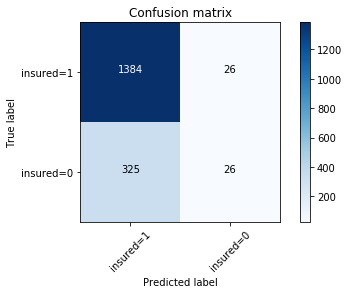

In [65]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['insured=1','insured=0'],
                      normalize = False,  title='Confusion matrix')

In [35]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.47      0.07      0.12       512
           1       0.81      0.98      0.89      2129

    accuracy                           0.80      2641
   macro avg       0.64      0.53      0.51      2641
weighted avg       0.75      0.80      0.74      2641



The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The recall is intuitively the ability of the classifier to find all the positive samples.
The F-score can be interpreted as a weighted harmonic mean of the precision and recall, 
where an F-score reaches its best value at 1 and worst score at 0.
The support is the number of occurrences of each class in y_test.

Implementing the model

In [18]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.662196
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.328    
Dependent Variable: y                AIC:              11675.3057
Date:               2019-06-09 12:40 BIC:              11739.0503
No. Observations:   8802             Log-Likelihood:   -5828.7   
Df Model:           8                LL-Null:          -4390.1   
Df Residuals:       8793             LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.0934      0.0223     4.1892    0.0000     0.0497     0.1371
x2     0.1805      0.0241     7.4918    0.0000     0.1

The p-values for most of the variables are smaller than 0.05, 
except region of residence and the ethnicity, therefore, we will remove them.

In [22]:
cols = ['report', 'age', 'gender', 'married', 'employed', 'household', 'education'] 
X = df[cols]
y = df['insured']

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.455423
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.087      
Dependent Variable: insured          AIC:              8031.2588  
Date:               2019-06-09 12:52 BIC:              8080.8379  
No. Observations:   8802             Log-Likelihood:   -4008.6    
Df Model:           6                LL-Null:          -4390.1    
Df Residuals:       8795             LLR p-value:      1.5833e-161
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
report         0.7710    0.0766   10.0622  0.0000   0.6208   0.9212
age            0.0328    0.0021   15.5085  0.0000

Conclusion: self health status report, age, gender, marital staus, self employment status, 
    size of houshold and level of education influence the uptake of healthcare insurance

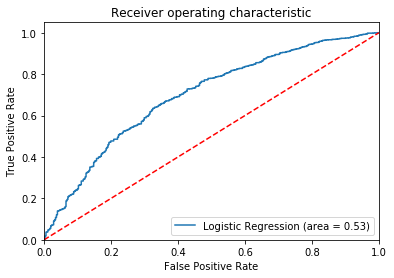

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is 
another common tool used with binary classifiers. The dotted line represents 
the ROC curve of a purely random classifier; a good classifier stays as 
far away from that line as possible (toward the top-left corner).